## GitHub Social Network (ML vs web developers)

### Data <a link = 'http://snap.stanford.edu/data/github-social.html'> obtained </a> on 11.12.2019, 17:22 

Copyright 2020 Firas Swidan†

Licensed under the Apache License, Version 2.0 (the "License"); you may not
use this file except in compliance with the License. You may obtain a copy of
the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations under
the License.

In [8]:
! wget https://raw.githubusercontent.com/DS-tukey/Modules/master/network_analysis.py
! wget https://raw.githubusercontent.com/DS-tukey/Modules/master/plotting.py

--2020-08-05 11:11:03--  https://raw.githubusercontent.com/DS-tukey/Modules/master/network_analysis.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 2562 (2.5K) [text/plain]
Saving to: ‘network_analysis.py’

network_analysis.py 100%[===================>]   2.50K  --.-KB/s    in 0s      

2020-08-05 11:11:03 (14.4 MB/s) - ‘network_analysis.py’ saved [2562/2562]

--2020-08-05 11:11:04--  https://raw.githubusercontent.com/DS-tukey/Modules/master/plotting.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 420 [text/plain]
Saving to: ‘plotting.py.1’

plotting.py.1       100%[===================>]     420  --.-KB/s  

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import network_analysis as na
%matplotlib inline

In [2]:
! unzip git_web_ml.zip

Archive:  git_web_ml.zip
   creating: git_web_ml/
  inflating: git_web_ml/musae_git_edges.csv
  inflating: git_web_ml/musae_git_features.json
  inflating: git_web_ml/musae_git_target.csv  
  inflating: git_web_ml/citing.txt   
  inflating: git_web_ml/README.txt   


# Exploratory analysis

In [3]:
df = pd.read_csv('git_web_ml/musae_git_edges.csv', dtype = np.int64)

In [4]:
df.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [5]:
g = nx.from_pandas_edgelist(df, source = 'id_1', target = 'id_2')

In [6]:
len(g.edges())

289003

In [7]:
len(g.nodes())

37700

In [8]:
nx.is_connected(g)

True

In [9]:
target = pd.read_csv('git_web_ml/musae_git_target.csv', index_col = 'id')

In [10]:
target.head()

,name,ml_target
id,,
0,Eiryyy,0
1,shawflying,0
2,JpMCarrilho,1
3,SuhwanCha,0
4,sunilangadi2,1


In [11]:
target.describe()

,ml_target
count,37700.000000
mean,0.258329
std,0.437722
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
nd = g.nodes()

In [13]:
node_att = dict(zip(target.index, target['ml_target'].astype(str)))

In [14]:
nx.set_node_attributes(g, node_att, name = 'target')

In [15]:
target['clustering'] = pd.Series(nx.clustering(g))

In [16]:
target['dc'] = pd.Series(dict(nx.degree_centrality(g)))

In [17]:
target['name_len'] = target['name'].str.len()

In [18]:
target['name_digit_count'] = target['name'].str.count(r'w')

In [19]:
#target['cc'] = pd.Series(dict(nx.closeness_centrality(g))) # computationally expensive

In [20]:
target['bc'] = pd.Series(dict(nx.betweenness_centrality(g, k = 92)))

In [21]:
target['pr'] = pd.Series(dict(nx.pagerank(g)))

In [22]:
hub, authority = nx.hits(g)
target['hub'] = pd.Series(dict(hub))
target['authority'] = pd.Series(dict(authority))

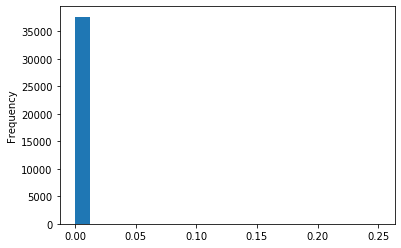

In [23]:
target['dc'].plot.hist(bins = 20)

In [24]:
target['dc'].describe()

count    37700.000000
mean         0.000407
std          0.002143
min          0.000027
25%          0.000053
50%          0.000159
75%          0.000345
max          0.250882
Name: dc, dtype: float64

In [25]:
target.head()

,name,ml_target,clustering,dc,name_len,name_digit_count,bc,pr,hub,authority
id,,,,,,,,,,
0,Eiryyy,0,0.000000,0.000027,6,0,0.000000e+00,0.000005,5.244636e-07,5.244636e-07
1,shawflying,0,0.178571,0.000212,10,1,5.613535e-07,0.000017,1.063578e-05,1.063578e-05
2,JpMCarrilho,1,0.000000,0.000027,11,0,0.000000e+00,0.000005,4.019438e-07,4.019438e-07
3,SuhwanCha,0,0.000000,0.000133,9,1,2.663058e-05,0.000017,1.168510e-06,1.168510e-06
4,sunilangadi2,1,0.000000,0.000053,12,0,0.000000e+00,0.000011,9.663848e-08,9.663848e-08


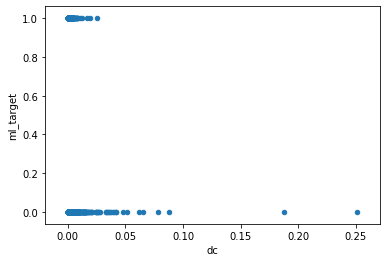

In [26]:
target.plot.scatter('dc', 'ml_target')

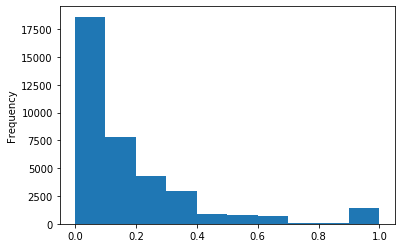

In [27]:
target['clustering'].plot.hist()

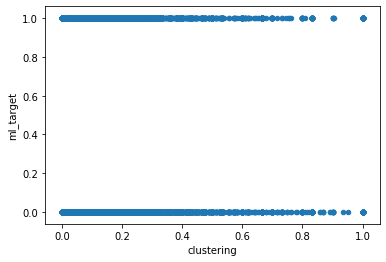

In [28]:
target.plot.scatter('clustering', 'ml_target')

In [29]:
import plotting as pltting

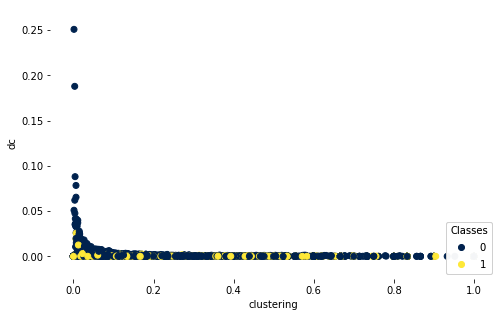

In [30]:
pltting.classes_colored_scatter(x = 'clustering', y = 'dc', c = 'ml_target', data = target)

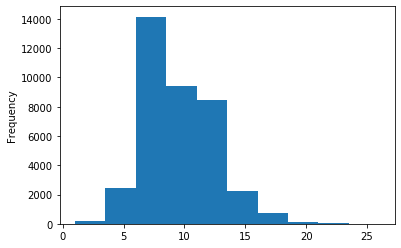

In [31]:
target['name_len'].plot.hist()

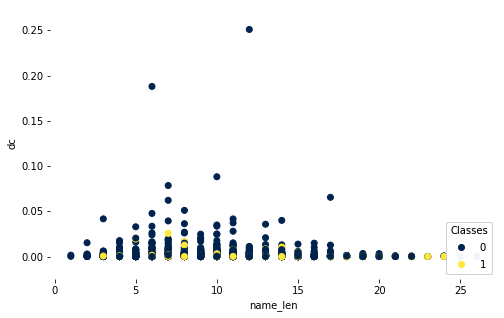

In [32]:
pltting.classes_colored_scatter(x = 'name_len', y = 'dc', c = 'ml_target', data = target)

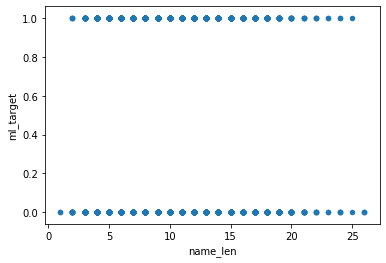

In [33]:
target.plot.scatter('name_len', 'ml_target')

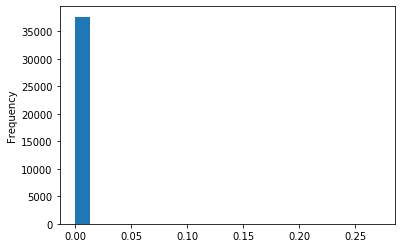

In [34]:
target['bc'].plot.hist(bins = 20)

In [35]:
target['bc'].describe()

count    3.770000e+04
mean     6.166636e-05
std      1.906278e-03
min      0.000000e+00
25%      2.594707e-09
50%      7.918338e-07
75%      1.022825e-05
max      2.713676e-01
Name: bc, dtype: float64

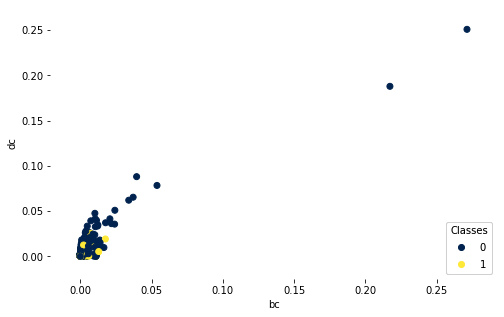

In [36]:
pltting.classes_colored_scatter(x = 'bc', y = 'dc', c = 'ml_target', data = target)

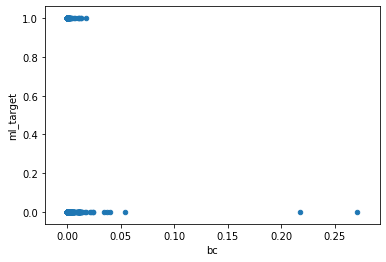

In [37]:
target.plot.scatter('bc', 'ml_target')

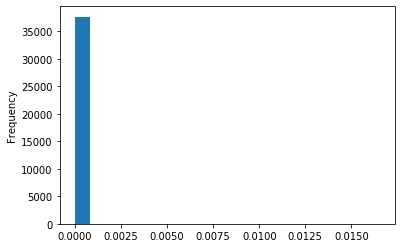

In [38]:
target['pr'].plot.hist(bins = 20)

In [39]:
target['pr'].describe()

count    37700.000000
mean         0.000027
std          0.000130
min          0.000005
25%          0.000008
50%          0.000013
75%          0.000024
max          0.016514
Name: pr, dtype: float64

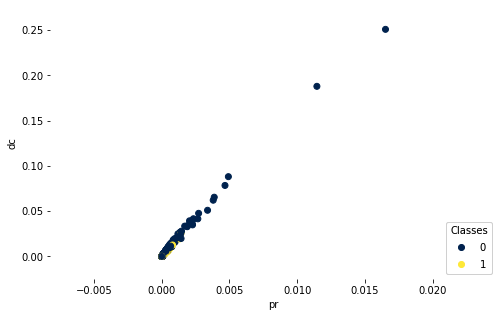

In [40]:
pltting.classes_colored_scatter(x = 'pr', y = 'dc', c = 'ml_target', data = target)

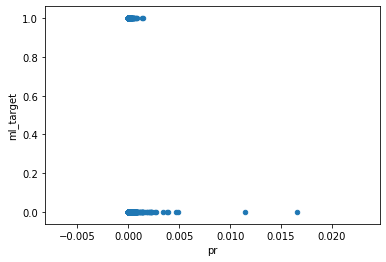

In [41]:
target.plot.scatter('pr', 'ml_target')

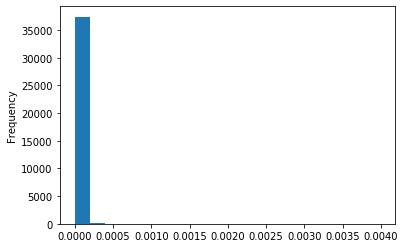

In [42]:
target['hub'].plot.hist(bins = 20)

In [43]:
target['hub'].describe()

count    3.770000e+04
mean     2.652520e-05
std      5.109038e-05
min      3.962197e-14
25%      1.868477e-06
50%      1.211631e-05
75%      3.562959e-05
max      3.977555e-03
Name: hub, dtype: float64

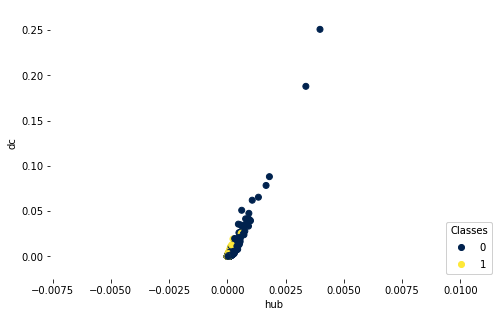

In [44]:
pltting.classes_colored_scatter(x = 'hub', y = 'dc', c = 'ml_target', data = target)

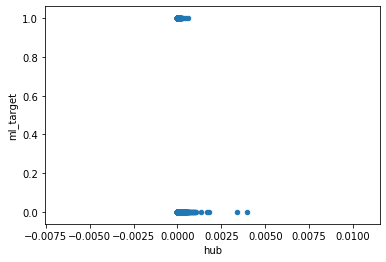

In [45]:
target.plot.scatter('hub', 'ml_target')

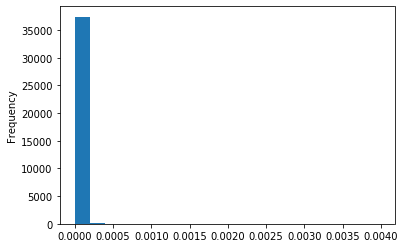

In [46]:
target['authority'].plot.hist(bins = 20)

In [47]:
target['authority'].describe()

count    3.770000e+04
mean     2.652520e-05
std      5.109038e-05
min      3.962197e-14
25%      1.868477e-06
50%      1.211631e-05
75%      3.562959e-05
max      3.977555e-03
Name: authority, dtype: float64

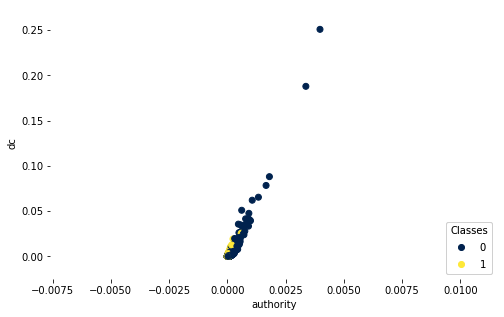

In [48]:
pltting.classes_colored_scatter(x = 'authority', y = 'dc', c = 'ml_target', data = target)

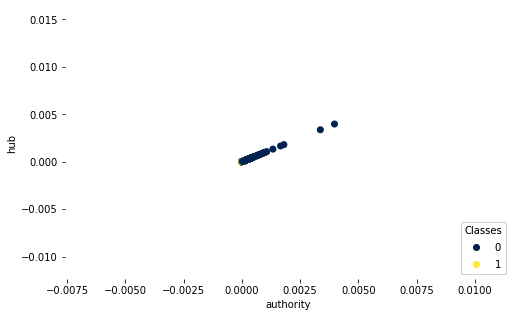

In [49]:
pltting.classes_colored_scatter(x = 'authority', y = 'hub', c = 'ml_target', data = target)

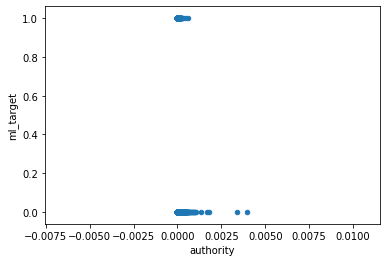

In [50]:
target.plot.scatter('authority', 'ml_target')

### Reading additional node features

In [51]:
import json

with open('git_web_ml/musae_git_features.json', encoding = 'utf-8') as f:
    json_data = json.load(f)
    #print(json_data)

In [52]:
l = list()
max([max(lst) for lst in json_data.values()])

4004

In [53]:
l = list()
min([min(lst) for lst in json_data.values()])

0

In [54]:
max(list(range(0, 4005)))

4004

In [55]:
col_names = range(0, 4005)

In [56]:
nf = np.zeros( (len(target.index), len(col_names)), dtype = np.int16)

In [57]:
for k in json_data.keys():
    #print(k)
    nf[int(k), json_data[k]] = 1

In [58]:
node_features = pd.DataFrame(data = nf, index = target.index, columns = col_names )

In [59]:
df = pd.merge(target, node_features, left_index = True, right_index = True)

In [60]:
df.head()

,name,ml_target,clustering,dc,name_len,name_digit_count,bc,pr,hub,authority,...,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004
id,,,,,,,,,,,,,,,,,,,,,
0,Eiryyy,0,0.000000,0.000027,6,0,0.000000e+00,0.000005,5.244636e-07,5.244636e-07,...,0,0,0,0,0,0,0,0,0,0
1,shawflying,0,0.178571,0.000212,10,1,5.613535e-07,0.000017,1.063578e-05,1.063578e-05,...,0,0,0,0,0,0,0,0,0,0
2,JpMCarrilho,1,0.000000,0.000027,11,0,0.000000e+00,0.000005,4.019438e-07,4.019438e-07,...,0,0,0,0,0,0,0,0,0,0
3,SuhwanCha,0,0.000000,0.000133,9,1,2.663058e-05,0.000017,1.168510e-06,1.168510e-06,...,0,0,0,0,0,0,0,0,1,0
4,sunilangadi2,1,0.000000,0.000053,12,0,0.000000e+00,0.000011,9.663848e-08,9.663848e-08,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#%%timeit -r 1 -n 1
#%%memit 
#target['eccentricity'] = pd.Series(dict(nx.eccentricity(g))) # computationally expensive

In [62]:
#%%timeit -r 1 -n 1
#target['closeness'] = pd.Series(dict(nx.closeness_centrality(g))) #computationally too expensive

In [63]:
feature_names = list(set(df.columns.values) - set(['name', 'ml_target']))

In [64]:
Y = df['ml_target']
X = df[ feature_names ]

In [65]:
Y.describe()

count    37700.000000
mean         0.258329
std          0.437722
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ml_target, dtype: float64

## ML Model using all features

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [69]:
rfc = LogisticRegression(solver = 'newton-cg', random_state = 3, verbose = 1, n_jobs = -1)
parameters = {'C':[.15, .25, .5]}
clf = GridSearchCV(rfc, param_grid = parameters, cv = 5, scoring = 'roc_auc')

In [70]:
%%timeit -r 1 -n 1

clf.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

35min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


In [71]:
clf.best_estimator_

LogisticRegression(C=0.15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=3, solver='newton-cg', tol=0.0001,
          verbose=1, warm_start=False)

In [72]:
clf.best_score_

0.896698814662768

In [73]:
import shap

shap.initjs()

In [74]:
X_train_sub = X_train.iloc[0:5000,]

In [75]:
explainer = shap.LinearExplainer(clf.best_estimator_, X_train_sub, feature_dependence = "independent")
shap_values = explainer.shap_values(X_train_sub)

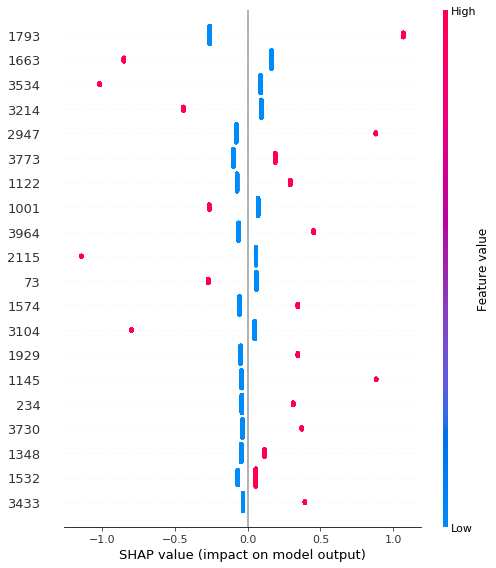

In [76]:
shap.summary_plot(shap_values, X_train_sub, feature_names = feature_names)

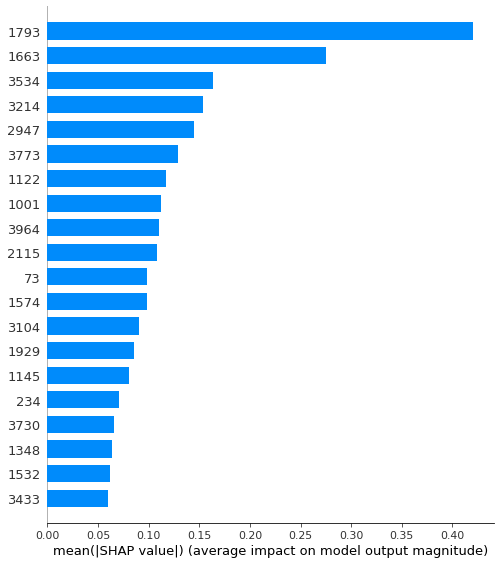

In [77]:
shap.summary_plot(shap_values, X_train_sub, plot_type = "bar")

In [78]:
clf.score(X_test, Y_test)

0.896715398001523

## ML Model using graph features only

In [79]:
graph_features = ['clustering', 'dc', 'name_len', 'name_digit_count', 'bc', 'pr', 'hub', 'authority']

In [80]:
X = target[graph_features]

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
rfc = RandomForestClassifier(random_state = 3, verbose = 1, n_jobs = -1)
parameters = {'n_estimators':[100, 150, 175, 200, 225], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(rfc, param_grid = parameters, cv = 5, scoring = 'roc_auc')

In [84]:
clf.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent wo

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=3, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150, 175, 200, 225], 'max_depth': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [85]:
list(zip(clf.best_estimator_.feature_importances_, graph_features))

[(0.10954261101925482, 'clustering'),
 (0.10181188404846427, 'dc'),
 (0.08941531116970033, 'name_len'),
 (0.013859880294104473, 'name_digit_count'),
 (0.1215540003554308, 'bc'),
 (0.14793630777489256, 'pr'),
 (0.20970257129200648, 'hub'),
 (0.20617743404614622, 'authority')]

In [86]:
clf.best_score_

0.7318944275404397

In [87]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=225, n_jobs=-1,
            oob_score=False, random_state=3, verbose=1, warm_start=False)

In [88]:
clf.score(X_test, Y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 225 out of 225 | elapsed:    0.2s finished


0.7280534394246053

†Dr Firas Swidan, PhD. firas.swidan@outlook.com

https://www.linkedin.com/in/swidan

POBox  8125,  Nazareth, Israel.

Public key: AAAAB3NzaC1yc2EAAAADAQABAAACAQD6Lt98LolwuA/aOcK0h91ECdeiyG3QKcUOT/CcMEPV64cpkv3jrLLGoag7YtzESZ3j7TLEd0WHZ/BZ9d+K2kRfzuuCdMMhrBwqP3YObbTbSIM6NjUNwbH403LLb3FuYApUt1EvC//w64UMm7h3fTo0vdyVuMuGnkRZuM6RRAXcODM4tni9ydd3ZQKN4inztkeH/sOoM77FStk8E2VYbljUQdY39zlRoZwUqNdKzwD3T2G00tmROlTZ6K5L8i68Zqt6s0XNS6XQvS3zXe0fI6UwuetnDrcVr1Yb8y2T8lfjMG9+9L2aKPoUOlOMMcyqM+oKVvRUOSdrzmtKOljnYC7TqzvsKrfXHvHlqHxxhPp1K7B/YWrHwCDbqp02dXdIaXkkHCIqKFNaY06HEWt4obDxppVhC8IabSb55LQVCCT7J4TFbwp6rID2+Y1L7NEvR3v3oaWSlQIZ+WSG04mwh9/7gRCt7XUoqmEXCCPoHqZXq5sWv193XA57pD5gKoX7Rf2i6UdbduNTMIhQMqcWIaPMBFwxUv/LRQCHnS+mlW2GnIHIHHGS/S46MurZ6BMvcb7fEz/NorVxvh3DbUaVTteMYcikH0y5sPmGECB1d99ENBBSEX6diI+PneFp2sOouQ6gOBWy6WAt3spGfLTOFMPo3bMV/UpktkQPpXkmfd1esQ==